In [1]:
from CompilerQC import Energy_landscape

In [2]:
import numpy as np
#from geneticalgorithm import geneticalgorithm as ga
import random
from CompilerQC import Graph
import  matplotlib.pyplot as plt
from shapely.geometry import Polygon, MultiPoint
from CompilerQC import Polygons
from CompilerQC import Energy
from CompilerQC import MC
from scipy.special import binom 
from copy import deepcopy
from itertools import permutations, combinations


In [5]:
N = 4
graph = Graph.fully(N)
polygon_object = Polygons(graph)
landscape = Energy_landscape(graph, polygon_object)
possible_fillings = landscape.get_all_combinations(n=[0, 1, 2, 3, 4, 6]) 

In [6]:
permutations_of_coords = list(map(landscape.grid_num_to_coords,
              landscape.get_all_permutations(possible_fillings)[0]))

In [7]:
energy_landscape = landscape.energy_landscape(permutations_of_coords, constant_for_exp=3)

In [8]:
wolfgang = np.load(f'Plots/data/wolfgangs_energy_landscape_N={N}.npy')
naiv = np.load(f'Plots/data/naiv_energy_landscape_N={N}.npy')

In [9]:
fit = Energy(polygon_object)
zeros = []
for coords in permutations_of_coords:
    polygon_object.update_qbits_coords(polygon_object.qbits, coords)
    fit(polygon_object)
    zeros.append(fit.distance_to_plaquette().count(0))
    

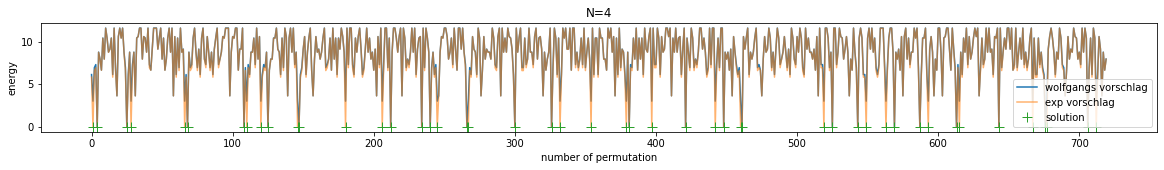

In [10]:
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
x = np.arange(len(wolfgang))
ax.plot(x, wolfgang,label='wolfgangs vorschlag',alpha=1)
ax.plot(x, energy_landscape,label='exp vorschlag',alpha=0.6)
# naiv[naiv >1] =np.nan
# ax.plot(x, naiv*300,label='naiv')
solutions = x[np.array(zeros)==graph.C]
ax.plot(solutions, [0]*len(solutions), '+', ms=10, label='solution')

plt.xlabel('number of permutation')
plt.ylabel('energy')
plt.title(f'N={N}')
plt.legend()
plt.savefig(f'Plots/energy_landscape_comparison_N={N}.svg')